In [2]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import utils
from keras.preprocessing import image 
from keras import layers
from keras.utils import image_dataset_from_directory
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
batch_size = 32
image_size = (300, 300)

train_dataset = image_dataset_from_directory('E:\\Canteen-food-dataset-main\\Black and white',
                                             subset='training',
                                             seed = 42,
                                             validation_split=0.2,
                                             batch_size=batch_size,
                                             image_size=image_size)
validation_dataset = image_dataset_from_directory('E:\\Canteen-food-dataset-main\\Black and white',
                                                  subset='validation',
                                                  seed = 42,
                                                  validation_split=0.2,
                                                  batch_size=batch_size,
                                                  image_size=image_size)

Found 4714 files belonging to 23 classes.
Using 3772 files for training.
Found 4714 files belonging to 23 classes.
Using 942 files for validation.


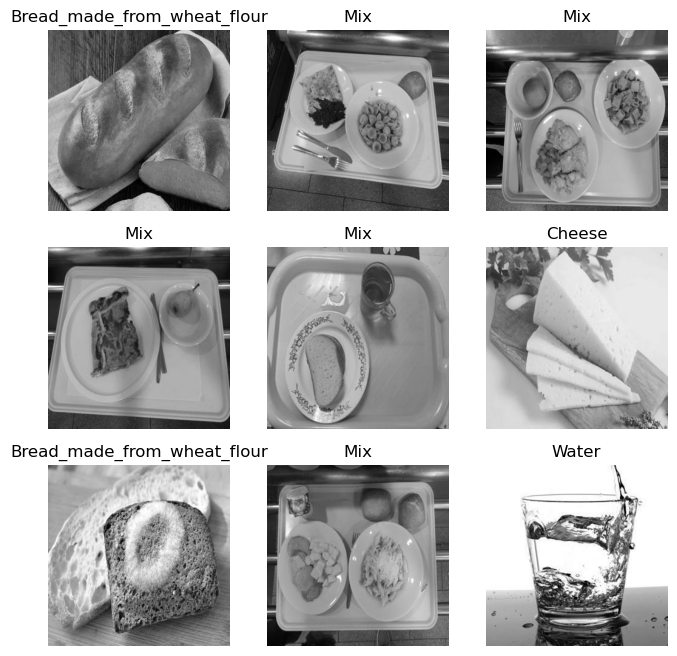

In [6]:
class_names = train_dataset.class_names
plt.figure(figsize = (8,8))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

In [7]:
test_dataset = image_dataset_from_directory('E:\\Canteen-food-dataset-main\\test',
                                            batch_size=batch_size,
                                            image_size=image_size)
                                            

Found 1221 files belonging to 23 classes.


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
model = Sequential()
model.add(Conv2D(16, (5,5), padding = 'same',
                 input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5,5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(131, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [10]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs = 10)

Epoch 1/10
118/118 [==============================] - 269s 2s/step - loss: 5.0788 - accuracy: 0.4295 - val_loss: 1.6155 - val_accuracy: 0.5244
Epoch 2/10
118/118 [==============================] - 250s 2s/step - loss: 1.3211 - accuracy: 0.6310 - val_loss: 1.0711 - val_accuracy: 0.6975
Epoch 3/10
118/118 [==============================] - 251s 2s/step - loss: 0.6462 - accuracy: 0.8131 - val_loss: 0.7258 - val_accuracy: 0.8365
Epoch 4/10
118/118 [==============================] - 253s 2s/step - loss: 0.3298 - accuracy: 0.9099 - val_loss: 0.6036 - val_accuracy: 0.8769
Epoch 5/10
118/118 [==============================] - 256s 2s/step - loss: 0.1879 - accuracy: 0.9507 - val_loss: 0.6843 - val_accuracy: 0.8917
Epoch 6/10
118/118 [==============================] - 249s 2s/step - loss: 0.1556 - accuracy: 0.9671 - val_loss: 0.6295 - val_accuracy: 0.8854
Epoch 7/10
118/118 [==============================] - 253s 2s/step - loss: 0.1214 - accuracy: 0.9756 - val_loss: 0.5879 - val_accuracy: 0.9023

In [14]:
scores = model.evaluate(test_dataset, verbose = 1)

print("Доля верных ответов на тестовых данных в процентах:", round(scores[1] * 100, 1))

39/39 [==============================] - 13s 333ms/step - loss: 0.6808 - accuracy: 0.9025
Доля верных ответов на тестовых данных в процентах: 90.3


In [6]:
img = ''
predict_arr = [] #массив байтов загруженной фотографии
predict_arrImage =[] # массив загруженных фоток
pred_className = '' #предсказанный класс 
predicted_label = '' #предсказанный название продукта


In [13]:
image = ''
predict_arrayBytesImg = []
predict_Image = ''
predict_classNameImage =''
predict_labelProduct = ''

def returnImage(path):

    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

    image = tf.keras.utils.load_img(path, color_mode = 'l', target_size = (300,300))
    
    predict_arrayBytesImg = predict(probability_model,img)


def predict(model, image):
    
    img_arr = tf.keras.utils.img_to_array(img)
    img_arr = tf.expand_dims(img_arr,0)

    predict_arrayBytesImg.append(model.predict(img_arr))
    predict_arrImage.append(image)

    predict_labelProduct = np.argmax(predict_arrayBytesImg)

    predict_classNameImage = class_names[predicted_label]

    print(str(predict_classNameImage), str(predict_labelProduct))
    


returnImage('E:\Canteen-food-dataset-main\test\Casserole\\20.jpg')

OSError: [Errno 22] Invalid argument: 'E:\\Canteen-food-dataset-main\test\\Casserole\\20.jpg'

In [ ]:
def predict(model, img):
    
  img_arr = tf.keras.utils.img_to_array(img)
  img_arr = tf.expand_dims(img_arr,0)
    
  predict_arrImage.append(img)
  predict_arr.append(model.predict(img_arr))

  return predict_arr 



def plot_image(i, images_arrayBytes, true_label, img):

  true_label, img = true_label[i], img[i]
  
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)


  predicted_label = np.argmax(images_arrayBytes)
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'black'

  pred_className = class_names[predicted_label]
  
  percent_predItem = np.max(images_arrayBytes)
  pred_color = color
  
  plt.xlabel("{} ({})".format(pred_className,pred_className,pred_color))
  plt.show()


  import csv
  print(pred_className)


  """ if(pred_className.__contains__('_good')):
  pred_className = pred_className.replace('_good', '')
  if(pred_className.__contains__('_bad')):
  pred_className = pred_className.replace('_bad', '') """

  arrayRows = []

  with open('C:\\calories.csv', 'r', newline='', encoding='utf8') as csvfile:
    spamreader = csv.reader(csvfile,  delimiter='"')
    for row in spamreader:
      if row[i].__contains__(pred_className):
        arrayRows = row[i].split(',')
        print(', '.join(row))
        
  arrayInfo = []

  caloriesInfo = arrayRows[2]

  arrayInfo.append(arrayRows[3])
  arrayInfo.append(arrayRows[4])
  arrayInfo.append(arrayRows[5])

  arrayNames = 'Белки', 'Жиры', 'Углеводы'

  fig1, ax1 = plt.subplots()

  ax1.pie(arrayInfo, labels = arrayNames)
  ax1.axis('equal')

  plt.xlabel(f'Калории: {caloriesInfo:2}')
  plt.show()

  
def predictPhoto():

  probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

  img = tf.keras.utils.load_img('E:\Canteen-food-dataset-main\Black and white\Coffee\\3.jpg', target_size = (300,300))
    
  arrayImagesBytes = predict(probability_model,img)

  plot_image(0, arrayImagesBytes, class_names, predict_arrImage)


1/1 [==============================] - 0s 206ms/step


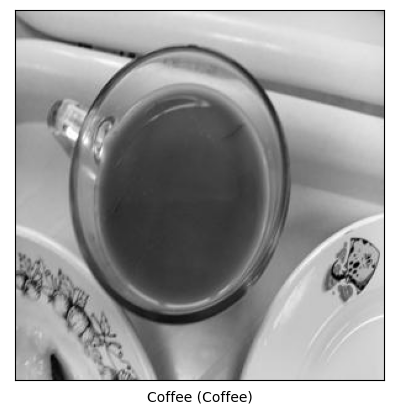

Coffee
Coffee,250.00,2.50,0.030,0.050,0.100


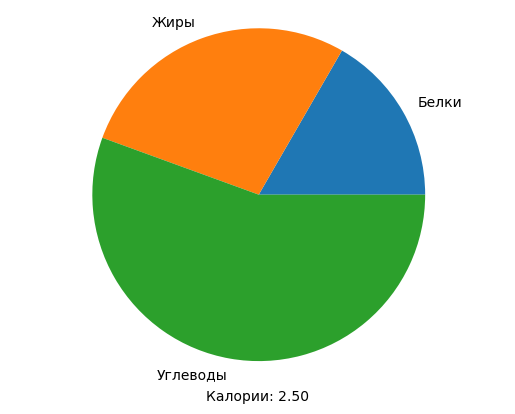

In [ ]:
predictPhoto()

TypeError: path should be path-like or io.BytesIO, not <class 'list'>

TypeError: list indices must be integers or slices, not str

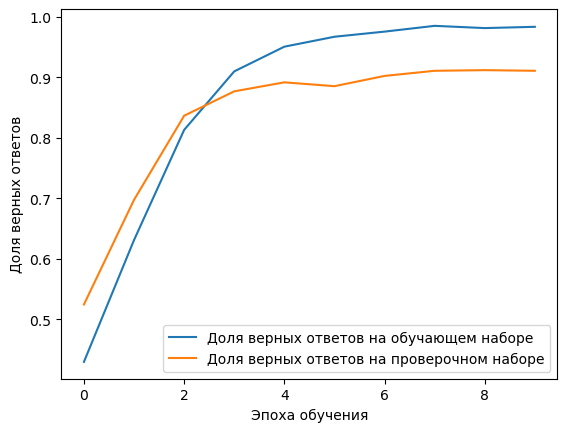

In [15]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()



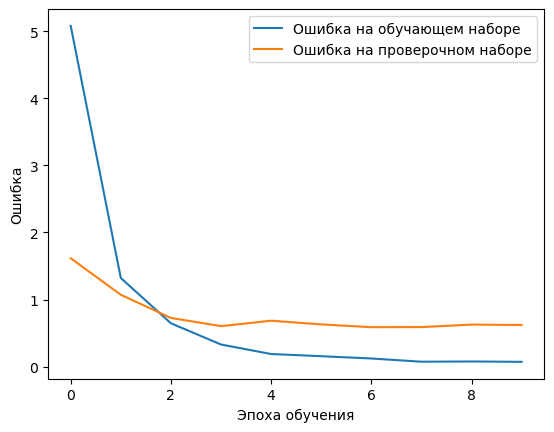

In [16]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [19]:
model.save("food_model.h5")

In [3]:
model_loaded = tf.keras.models.load_model('E:\\food_model.h5')